In [1]:
import numpy as np
import matplotlib.pyplot as plt
from well import Well
from geometry_keeper import GeometryKeeper
from scipy.integrate import quad
from scipy.special import k0, iti0k0
import matplotlib.pyplot as plt
% matplotlib inline
from time import time

In [2]:
top_bound = "imp"
bottom_bound = "imp"
wtype = "frac"
n_stehf = 10
xwd = 2.5
xed = 5.
ywd = 2.5
yed = 5.
N = 20
Fcd = 10

params = {"nseg": N, "kx": 1., "ky": 1., "kz": 1., "omega": 1, "lambda": 1, "Fcd":Fcd, "ref_length":1.,
         "z_ref_length": 1, "xed": xed, "yed": yed}
nnnn_well = Well(xwd, ywd, "nnnn", top_bound, bottom_bound, wtype, params, n_stehf)
inf_well = Well(xwd, ywd, "infinite", top_bound, bottom_bound, wtype, params, n_stehf)

In [3]:
from new_struct.well import Well as NewWell

In [4]:
new_well_nnnn = NewWell("nnnn", top_bound, bottom_bound, "frac", N, 1, [xwd], [ywd], x_lengths = 1,
                     xed = xed, yed = yed, attrs = {"Fcd":Fcd})
new_well_inf = NewWell("inf", top_bound, bottom_bound, "frac", N, 1, [0.], [0.], x_lengths = 1,
                     xed = xed, yed = yed, attrs = {"Fcd":Fcd})

In [5]:
ts = np.logspace(-3, 1, 41)

In [6]:
p_inf_old = []
p_inf_new = []
for t in ts:
    p_inf_old.append(inf_well.get_pw(t))
    p_inf_new.append(new_well_inf.pw(t))

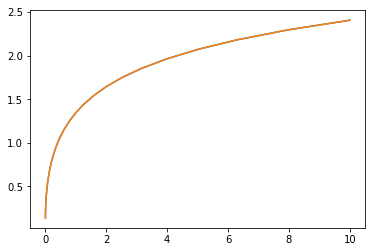

In [7]:
plt.plot(ts, p_inf_old)
plt.plot(ts, p_inf_new)

In [16]:
t1 = time()
p_nnnn_old = []
for t in ts:
    p_nnnn_old.append(nnnn_well.get_pw(t))
print(time() - t1)

23.72435688972473


In [17]:
t1 = time()
p_nnnn_new = []
for t in ts:
    p_nnnn_new.append(new_well_nnnn.pw(t))
print(time() - t1)

6.1653525829315186


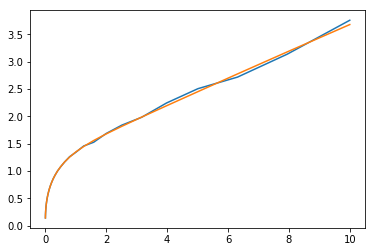

In [18]:
plt.plot(ts, p_nnnn_old)
plt.plot(ts, p_nnnn_new)

In [12]:
arg_x_0, arg_x_1, arg_x_2, arg_x_3, arg_y_1, arg_y_2, arg_y_3, arg_y_4 = new_well_nnnn.lapl_well.matrixizer.m_cache["fb_1_2_nnnn"]

In [10]:
ss = 1/ts

In [14]:
from new_struct.integrators.frac_nnnn import ifb2

In [15]:
fb2s = []
for s in ss:
    fb2s.append(ifb2(s, arg_x_1, arg_x_2, arg_x_3, arg_y_1, arg_y_2, arg_y_3, arg_y_4, xed, yed))

In [19]:
fb2s = np.array(fb2s)

In [23]:
np.linalg.norm(fb2s, axis=(1,2))

array([  1.03437132e-70,   3.32713333e-63,   1.64955245e-56,
         1.54446767e-50,   3.27256467e-45,   1.84368009e-40,
         3.18793253e-36,   1.92257293e-32,   4.53173307e-29,
         4.62093924e-26,   2.23126361e-23,   5.53022136e-21,
         7.56018068e-19,   6.07819870e-17,   3.04314536e-15,
         9.98507921e-14,   2.24725250e-12,   3.61317076e-11,
         4.30360519e-10,   3.92254195e-09,   2.81624956e-08,
         1.63442738e-07,   7.84588229e-07,   3.17946473e-06,
         1.10738270e-05,   3.36731367e-05,   9.06199337e-05,
         2.18393156e-04,   4.76193118e-04,   9.47920675e-04,
         1.73661883e-03,   2.94961131e-03,   4.67631292e-03,
         6.96464486e-03,   9.80389661e-03,   1.31203209e-02,
         1.67872431e-02,   2.06462476e-02,   2.45326207e-02,
         2.82979939e-02,   3.18255076e-02])

In [8]:
xis, xjs, xj1s, yws, yds, zws, zds = new_well_nnnn.lapl_well.matrixizer.raw

In [14]:
fb2s_old = []
for s in ss:
    fb2s_old.append(nnnn_well.lapl_well.source.ifb2(s, xis, xjs, xj1s, xed, yds, yws, yed))

In [15]:
fb2s_old = np.array(fb2s_old)
np.linalg.norm(fb2s_old, axis=(1,2))

array([  1.03289453e-70,   3.32411397e-63,   1.64865072e-56,
         1.54398747e-50,   3.27202048e-45,   1.84352657e-40,
         3.18780863e-36,   1.92254054e-32,   4.53173307e-29,
         4.62093924e-26,   2.23126361e-23,   5.53022136e-21,
         7.56018068e-19,   6.07819870e-17,   3.04314536e-15,
         9.98507921e-14,   2.24725250e-12,   3.61317076e-11,
         4.30360519e-10,   3.92254195e-09,   2.81624956e-08,
         1.63442738e-07,   7.84588229e-07,   3.17946473e-06,
         1.10738270e-05,   3.36731367e-05,   9.06199337e-05,
         2.18393156e-04,   4.76193118e-04,   9.47920675e-04,
         1.73661883e-03,   2.94961131e-03,   4.67631292e-03,
         6.96464486e-03,   9.80389661e-03,   1.31203209e-02,
         1.67872431e-02,   2.06462476e-02,   2.45326207e-02,
         2.82979939e-02,   3.18255076e-02])

In [20]:
mf_well_nnnn = NewWell("nnnn", top_bound, bottom_bound, "frac", N, 3, [xwd, xwd, xwd], [ywd-1, ywd, ywd+1], x_lengths = 1,
                     xed = xed, yed = yed, attrs = {"Fcd":Fcd})
mf_well_inf = NewWell("inf", top_bound, bottom_bound, "frac", N, 3, [0., 0., 0.], [-1., 0., 1.], x_lengths = 1,
                     xed = xed, yed = yed, attrs = {"Fcd":Fcd})

In [21]:
p_mf_inf = []
for t in ts:
    p_mf_inf.append(mf_well_inf.pw(t))

In [22]:
p_mf_nnnn = []
for t in ts:
    p_mf_nnnn.append(mf_well_nnnn.pw(t))

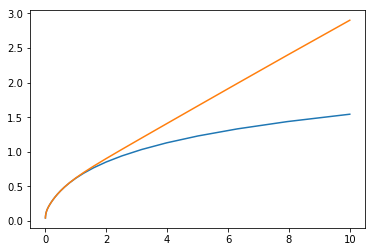

In [23]:
plt.plot(ts, p_mf_inf)
plt.plot(ts, p_mf_nnnn)